# Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Ensuring Reproducibilty

np.random.seed(42)

# Reading the data

In [4]:
data = pd.read_csv('../data/spam.csv', encoding='latin-1')

# Exploring the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [6]:
# checking the head
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,"Ok lar... Joking wif u oni...,,,"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# checking to see if our data set is imbalanced

data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

## We have an imbalanced dataset

In [7]:
# fixing the mistake

#data['Unnamed: 2'] = data['Unnamed: 2'].fillna(',')
#data['Unnamed: 3'] = data['Unnamed: 3'].fillna(',')
#data['Unnamed: 4'] = data['Unnamed: 4'].fillna(',')

#data['Sms'] = data['v2'] + data['Unnamed: 2'] + data['Unnamed: 3'] + data['Unnamed: 4']

In [12]:
#data.drop(['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['Value', 'Sms']

In [12]:
#data.to_csv('spammm.csv', index=False)

In [13]:
# describing the data

data.describe()

,Value,Sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later,,,"
freq,4825,30


In [14]:
data.groupby('Value').describe()

Sms                                                               
      count unique                                                top freq
Value                                                                     
ham    4825   4516                          Sorry, I'll call later,,,   30
spam    747    653  Please call our customer service representativ...    4

# Feature Engineering

In [15]:
# encoding spam and ham

def spam(x):
    if x == 'spam':
        return 1.0
    elif x == 'ham':
        return 0.0

data['Value'] = data['Value'].apply(spam)

In [16]:
# checking the lenghts of each text, if it contains links, the word "call" or words "text, txt, send"

# first we need to convert all the words in the sms column to lower case

# We actually noticed that most spam messages contain the words [call, text, txt, apply, http, www, free]


def lower(x):
    case = x.lower()
    return case


def length(x):
    answer = len(x)
    return float(answer)


def ifspampresent(x):
    text = [
        'txt', 'text', 'send', 'reply', 'apply', 'pay', 'borrow', 'earn',
        'save', 'expires', 'valid', 'recharge', 'validity', 'www', 'htt',
        'visit', 'participate', 'click', 'clicking', 'link', 'enter', 'call',
        'customer', 'representative', 'dial', 'incoming', 'free', 'reward',
        'congratulations', 'enjoy', 'loan', 'offer', 'bonus', 'money',
        'credit', 'renew', 'data', 'airtime', 'internet', 'bundle', 'balance',
        'recharge', 'account', 'mins', 'minutes', 'win'
    ]
    words = x.split()
    for word in words:
        if word in text:
            return 1.0
    return 0.0


data['Sms'] = data['Sms'].apply(lower)
data['Length'] = data['Sms'].apply(length)
data['SpamWords'] = data['Sms'].apply(ifspampresent)

In [17]:
data.head()

,Value,Sms,Length,SpamWords
0,0.0,"go until jurong point, crazy.. available only ...",114.0,0.0
1,0.0,"ok lar... joking wif u oni...,,,",32.0,0.0
2,1.0,free entry in 2 a wkly comp to win fa cup fina...,158.0,1.0
3,0.0,u dun say so early hor... u c already then say...,52.0,0.0
4,0.0,"nah i don't think he goes to usf, he lives aro...",64.0,0.0


In [18]:
data.SpamWords.value_counts()

0.0    4360
1.0    1212
Name: SpamWords, dtype: int64

In [19]:
data.Value.value_counts()

0.0    4825
1.0     747
Name: Value, dtype: int64

# Exploratory Data Analysis

In [20]:
data.describe(include='all')

,Value,Sms,Length,SpamWords
count,5572.000000,5572,5572.000000,5572.000000
unique,NaN,5168,NaN,NaN
top,NaN,"sorry, i'll call later,,,",NaN,NaN
freq,NaN,30,NaN,NaN
mean,0.134063,NaN,83.883166,0.217516
std,0.340751,NaN,60.130453,0.412594
min,0.000000,NaN,5.000000,0.000000
25%,0.000000,NaN,39.000000,0.000000
50%,0.000000,NaN,65.000000,0.000000
75%,0.000000,NaN,127.000000,0.000000


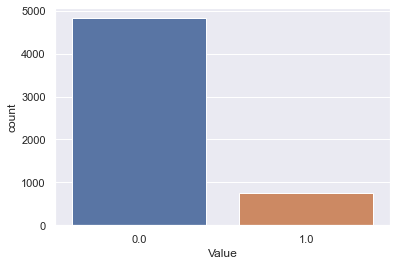

In [21]:
sns.countplot(data['Value'])

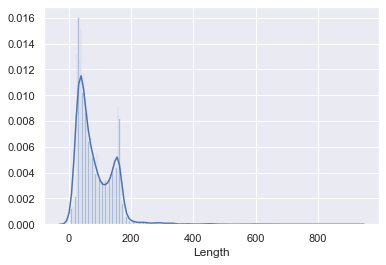

In [22]:
sns.distplot(data['Length'], bins=200)

<Figure size 1440x720 with 0 Axes>

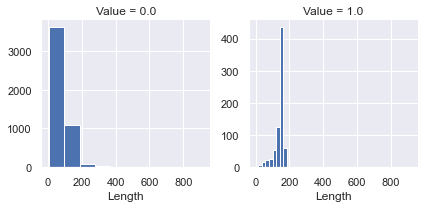

In [23]:
plt.figure(figsize = (20, 10))

g = sns.FacetGrid(col='Value', data=data, sharey=False)
g.map(plt.hist, 'Length')

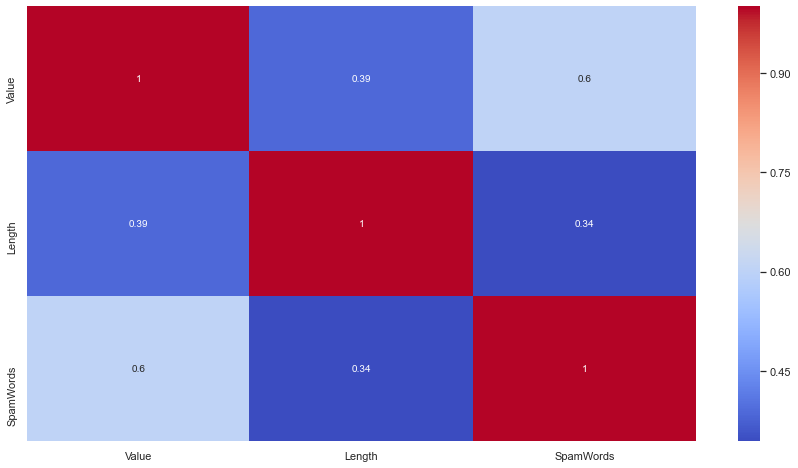

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

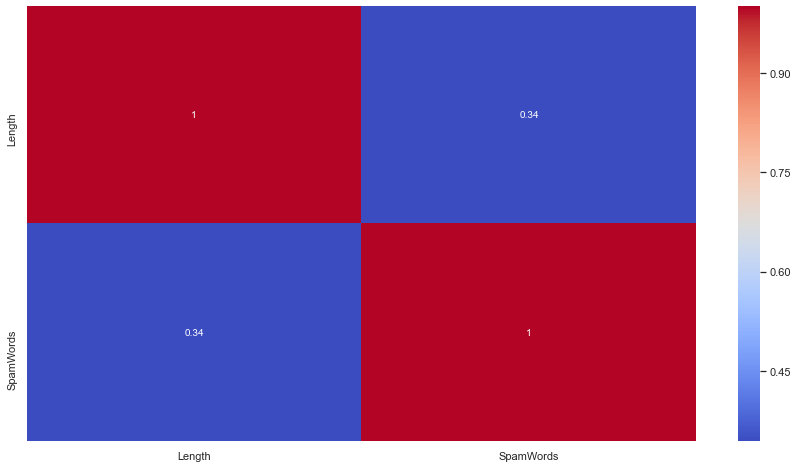

In [25]:
subset =  data.drop('Value', axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(subset.corr(), cmap='coolwarm', annot=True)

### From the heat maps above, the features we created would help to increase the accuracy of our model

# Encoding the Sms feature (Text Normalization and Preprocessing)

## Removing puntuations from the sms messages

In [26]:
import string

In [27]:
# remove String Punctuation

def removepun(x):
    letters = [word for word in x if word not in string.punctuation]
    fresh = ''.join(letters)
    return fresh

data['Sms'] = data['Sms'].apply(removepun)

## Removing Stop words

In [28]:
from nltk.corpus import stopwords

In [29]:
# remove stop words
# return list of words/tokenize


def removestop(x):
    sentence = [
        word for word in x.split() if word not in stopwords.words('english')]
    
    return sentence

# data['Sms'] = data['Sms'].apply(removestop)

In [30]:
data.head()

,Value,Sms,Length,SpamWords
0,0.0,go until jurong point crazy available only in ...,114.0,0.0
1,0.0,ok lar joking wif u oni,32.0,0.0
2,1.0,free entry in 2 a wkly comp to win fa cup fina...,158.0,1.0
3,0.0,u dun say so early hor u c already then say,52.0,0.0
4,0.0,nah i dont think he goes to usf he lives aroun...,64.0,0.0


In [31]:
# make of copy of our dataframe

df = data.copy()

## Word Vectorization

In [32]:
# Import count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [33]:
transformer = CountVectorizer(analyzer=removestop).fit(data['Sms'])

In [34]:
print(len(transformer.vocabulary_))

9533


In [35]:
sms = transformer.transform(data['Sms'])

In [36]:
print(sms.shape)

(5572, 9533)


In [37]:
sms.nnz

50108

## Term Weight and Normilization (TFIDF)

The tfidf transformation is the next step after the text has been encoded using count vectoriser. The way it works is to give higher weights to the words that appear less frequently or scarsely and less weights to the words that appear or are being used a lot. This helps the machine learning algorithm to easily identify the important words / words it should pay close attention to in the corpus/ dataset.

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
tfidf_tran = TfidfTransformer().fit(sms)

In [40]:
sms_tfidf = tfidf_tran.transform(sms)

In [41]:
sms_tfidf.shape

(5572, 9533)

In [42]:
data['Sms'] = sms_tfidf.toarray()

In [43]:
sms_tfidf

<5572x9533 sparse matrix of type '<class 'numpy.float64'>'
	with 50108 stored elements in Compressed Sparse Row format>

# Spliting the data

In [44]:
new = pd.concat([data.drop(['Value', 'Length', 'Sms'], axis=1), pd.DataFrame(sms_tfidf.toarray())], axis=1)

In [45]:
new.shape

(5572, 9534)

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

X = sms_tfidf.toarray()
y = data['Value'].values


ss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=10)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [47]:
X_train.shape

(4179, 9533)

# Spam Model Classification and Evaluation

In [48]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score

## The evaluation metrics we would be focusing on the most are
- Precision Score (Expecially for the spam class)
- F1 Score

## Random Forest

In [49]:
fr = RandomForestClassifier(class_weight='balanced_subsample')
fr.fit(X_train, y_train)
pred2 = fr.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1241
         1.0       0.81      1.00      0.90       152

    accuracy                           0.97      1393
   macro avg       0.91      0.99      0.94      1393
weighted avg       0.98      0.97      0.98      1393



AxesSubplot(0.125,0.125;0.62x0.755)


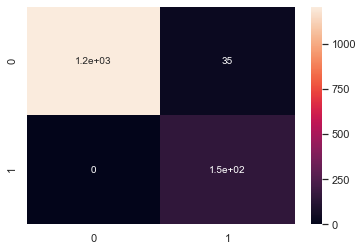

In [50]:
print(classification_report(pred2, y_test))
print('\n')
print(sns.heatmap(confusion_matrix(pred2, y_test), annot=True))

In [51]:
print(precision_score(pred2, y_test))
print(recall_score(pred2, y_test))
print(f1_score(pred2, y_test))
print(roc_auc_score(pred2, y_test))
print(accuracy_score(pred2, y_test))

0.8128342245989305
1.0
0.8967551622418879
0.9858984689766317
0.9748743718592965


## XGBOOST

In [104]:
pipe3 = Pipeline([
    ('bow', CountVectorizer(analyzer=removestop)),
    ('tfidf', TfidfTransformer()),
    ('model', XGBClassifier())
])

pipe3.fit(X_train, y_train)
pred3 = pipe3.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1511
         1.0       0.70      0.97      0.81       161

    accuracy                           0.96      1672
   macro avg       0.85      0.96      0.89      1672
weighted avg       0.97      0.96      0.96      1672



AxesSubplot(0.125,0.125;0.62x0.755)


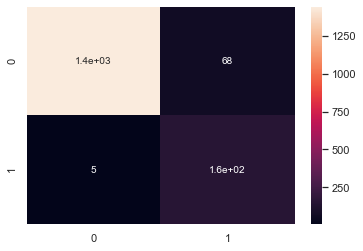

In [105]:
print(classification_report(pred3, y_test))
print('\n')
print(sns.heatmap(confusion_matrix(pred3, y_test), annot=True))

In [106]:
print(precision_score(pred3, y_test))
print(recall_score(pred3, y_test))
print(f1_score(pred3, y_test))
print(roc_auc_score(pred3, y_test))
print(accuracy_score(pred3, y_test))

0.6964285714285714
0.968944099378882
0.8103896103896104
0.9619703951560195
0.9563397129186603


## CATBOOST

In [107]:
pipe4 = Pipeline([
    ('bow', CountVectorizer(analyzer=removestop)),
    ('tfidf', TfidfTransformer()),
    ('model', CatBoostClassifier())
])

pipe4.fit(X_train, y_train)
pred4 = pipe4.predict(X_test)

Learning rate set to 0.018421
0:	learn: 0.6716252	total: 419ms	remaining: 6m 58s
1:	learn: 0.6522901	total: 554ms	remaining: 4m 36s
2:	learn: 0.6338651	total: 660ms	remaining: 3m 39s
3:	learn: 0.6148387	total: 725ms	remaining: 3m
4:	learn: 0.5975736	total: 792ms	remaining: 2m 37s
5:	learn: 0.5806089	total: 874ms	remaining: 2m 24s
6:	learn: 0.5650633	total: 971ms	remaining: 2m 17s
7:	learn: 0.5522930	total: 1.06s	remaining: 2m 12s
8:	learn: 0.5365920	total: 1.14s	remaining: 2m 5s
9:	learn: 0.5229512	total: 1.19s	remaining: 1m 58s
10:	learn: 0.5085093	total: 1.25s	remaining: 1m 51s
11:	learn: 0.4952371	total: 1.31s	remaining: 1m 47s
12:	learn: 0.4827996	total: 1.36s	remaining: 1m 43s
13:	learn: 0.4716140	total: 1.42s	remaining: 1m 39s
14:	learn: 0.4600522	total: 1.47s	remaining: 1m 36s
15:	learn: 0.4493820	total: 1.53s	remaining: 1m 33s
16:	learn: 0.4400573	total: 1.58s	remaining: 1m 31s
17:	learn: 0.4313504	total: 1.63s	remaining: 1m 28s
18:	learn: 0.4213591	total: 1.68s	remaining: 1m 2

160:	learn: 0.1451741	total: 9.79s	remaining: 51s
161:	learn: 0.1446185	total: 9.86s	remaining: 51s
162:	learn: 0.1442772	total: 9.93s	remaining: 51s
163:	learn: 0.1439165	total: 9.98s	remaining: 50.9s
164:	learn: 0.1435626	total: 10s	remaining: 50.8s
165:	learn: 0.1432902	total: 10.1s	remaining: 50.7s
166:	learn: 0.1430523	total: 10.1s	remaining: 50.6s
167:	learn: 0.1427139	total: 10.2s	remaining: 50.6s
168:	learn: 0.1423887	total: 10.3s	remaining: 50.5s
169:	learn: 0.1419396	total: 10.3s	remaining: 50.4s
170:	learn: 0.1415166	total: 10.4s	remaining: 50.4s
171:	learn: 0.1411924	total: 10.4s	remaining: 50.3s
172:	learn: 0.1406010	total: 10.5s	remaining: 50.2s
173:	learn: 0.1402490	total: 10.6s	remaining: 50.1s
174:	learn: 0.1398593	total: 10.6s	remaining: 50s
175:	learn: 0.1394238	total: 10.7s	remaining: 49.9s
176:	learn: 0.1391744	total: 10.7s	remaining: 49.9s
177:	learn: 0.1387105	total: 10.8s	remaining: 49.8s
178:	learn: 0.1384373	total: 10.8s	remaining: 49.8s
179:	learn: 0.1379548	

322:	learn: 0.1097761	total: 18.8s	remaining: 39.4s
323:	learn: 0.1095708	total: 18.8s	remaining: 39.3s
324:	learn: 0.1094492	total: 18.9s	remaining: 39.2s
325:	learn: 0.1092638	total: 19s	remaining: 39.2s
326:	learn: 0.1090295	total: 19s	remaining: 39.1s
327:	learn: 0.1089116	total: 19.1s	remaining: 39.1s
328:	learn: 0.1087021	total: 19.1s	remaining: 39s
329:	learn: 0.1086421	total: 19.2s	remaining: 38.9s
330:	learn: 0.1085660	total: 19.2s	remaining: 38.9s
331:	learn: 0.1085090	total: 19.3s	remaining: 38.8s
332:	learn: 0.1083637	total: 19.3s	remaining: 38.7s
333:	learn: 0.1083112	total: 19.4s	remaining: 38.7s
334:	learn: 0.1082599	total: 19.4s	remaining: 38.6s
335:	learn: 0.1080390	total: 19.5s	remaining: 38.5s
336:	learn: 0.1079701	total: 19.6s	remaining: 38.5s
337:	learn: 0.1078401	total: 19.6s	remaining: 38.4s
338:	learn: 0.1076827	total: 19.7s	remaining: 38.3s
339:	learn: 0.1075345	total: 19.7s	remaining: 38.3s
340:	learn: 0.1074483	total: 19.8s	remaining: 38.2s
341:	learn: 0.1073

483:	learn: 0.0932208	total: 28.5s	remaining: 30.4s
484:	learn: 0.0931619	total: 28.6s	remaining: 30.4s
485:	learn: 0.0931030	total: 28.7s	remaining: 30.3s
486:	learn: 0.0930445	total: 28.7s	remaining: 30.3s
487:	learn: 0.0928941	total: 28.8s	remaining: 30.2s
488:	learn: 0.0928379	total: 28.9s	remaining: 30.2s
489:	learn: 0.0927259	total: 28.9s	remaining: 30.1s
490:	learn: 0.0926658	total: 29s	remaining: 30.1s
491:	learn: 0.0926084	total: 29.1s	remaining: 30s
492:	learn: 0.0924471	total: 29.1s	remaining: 30s
493:	learn: 0.0923924	total: 29.2s	remaining: 29.9s
494:	learn: 0.0923394	total: 29.3s	remaining: 29.9s
495:	learn: 0.0922181	total: 29.4s	remaining: 29.8s
496:	learn: 0.0921596	total: 29.4s	remaining: 29.8s
497:	learn: 0.0921077	total: 29.5s	remaining: 29.7s
498:	learn: 0.0920474	total: 29.6s	remaining: 29.7s
499:	learn: 0.0919917	total: 29.7s	remaining: 29.7s
500:	learn: 0.0919332	total: 29.7s	remaining: 29.6s
501:	learn: 0.0918794	total: 29.8s	remaining: 29.6s
502:	learn: 0.0918

642:	learn: 0.0794025	total: 38s	remaining: 21.1s
643:	learn: 0.0793063	total: 38s	remaining: 21s
644:	learn: 0.0792150	total: 38.1s	remaining: 21s
645:	learn: 0.0791736	total: 38.1s	remaining: 20.9s
646:	learn: 0.0791321	total: 38.2s	remaining: 20.8s
647:	learn: 0.0790544	total: 38.3s	remaining: 20.8s
648:	learn: 0.0789181	total: 38.3s	remaining: 20.7s
649:	learn: 0.0788769	total: 38.4s	remaining: 20.7s
650:	learn: 0.0788359	total: 38.4s	remaining: 20.6s
651:	learn: 0.0786619	total: 38.5s	remaining: 20.5s
652:	learn: 0.0786013	total: 38.5s	remaining: 20.5s
653:	learn: 0.0785603	total: 38.6s	remaining: 20.4s
654:	learn: 0.0785197	total: 38.7s	remaining: 20.4s
655:	learn: 0.0784793	total: 38.7s	remaining: 20.3s
656:	learn: 0.0784391	total: 38.8s	remaining: 20.2s
657:	learn: 0.0783991	total: 38.8s	remaining: 20.2s
658:	learn: 0.0783590	total: 38.9s	remaining: 20.1s
659:	learn: 0.0782994	total: 38.9s	remaining: 20.1s
660:	learn: 0.0782595	total: 39s	remaining: 20s
661:	learn: 0.0780214	to

801:	learn: 0.0676306	total: 47.3s	remaining: 11.7s
802:	learn: 0.0675715	total: 47.4s	remaining: 11.6s
803:	learn: 0.0674346	total: 47.5s	remaining: 11.6s
804:	learn: 0.0674036	total: 47.6s	remaining: 11.5s
805:	learn: 0.0673727	total: 47.6s	remaining: 11.5s
806:	learn: 0.0672519	total: 47.7s	remaining: 11.4s
807:	learn: 0.0672033	total: 47.7s	remaining: 11.3s
808:	learn: 0.0671724	total: 47.8s	remaining: 11.3s
809:	learn: 0.0671417	total: 47.9s	remaining: 11.2s
810:	learn: 0.0671111	total: 47.9s	remaining: 11.2s
811:	learn: 0.0670811	total: 48s	remaining: 11.1s
812:	learn: 0.0670507	total: 48s	remaining: 11s
813:	learn: 0.0670205	total: 48.1s	remaining: 11s
814:	learn: 0.0669903	total: 48.1s	remaining: 10.9s
815:	learn: 0.0669603	total: 48.2s	remaining: 10.9s
816:	learn: 0.0669076	total: 48.2s	remaining: 10.8s
817:	learn: 0.0668177	total: 48.3s	remaining: 10.7s
818:	learn: 0.0666622	total: 48.4s	remaining: 10.7s
819:	learn: 0.0666321	total: 48.4s	remaining: 10.6s
820:	learn: 0.066602

961:	learn: 0.0585019	total: 57.1s	remaining: 2.25s
962:	learn: 0.0584516	total: 57.2s	remaining: 2.2s
963:	learn: 0.0584281	total: 57.2s	remaining: 2.14s
964:	learn: 0.0583414	total: 57.3s	remaining: 2.08s
965:	learn: 0.0583184	total: 57.4s	remaining: 2.02s
966:	learn: 0.0582809	total: 57.4s	remaining: 1.96s
967:	learn: 0.0582575	total: 57.5s	remaining: 1.9s
968:	learn: 0.0582342	total: 57.5s	remaining: 1.84s
969:	learn: 0.0582109	total: 57.6s	remaining: 1.78s
970:	learn: 0.0581615	total: 57.7s	remaining: 1.72s
971:	learn: 0.0581384	total: 57.7s	remaining: 1.66s
972:	learn: 0.0581153	total: 57.8s	remaining: 1.6s
973:	learn: 0.0580780	total: 57.8s	remaining: 1.54s
974:	learn: 0.0580553	total: 57.9s	remaining: 1.48s
975:	learn: 0.0580324	total: 57.9s	remaining: 1.42s
976:	learn: 0.0580095	total: 58s	remaining: 1.36s
977:	learn: 0.0579600	total: 58s	remaining: 1.3s
978:	learn: 0.0577759	total: 58.1s	remaining: 1.25s
979:	learn: 0.0577533	total: 58.2s	remaining: 1.19s
980:	learn: 0.057731

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1496
         1.0       0.77      0.98      0.86       176

    accuracy                           0.97      1672
   macro avg       0.89      0.97      0.92      1672
weighted avg       0.97      0.97      0.97      1672



AxesSubplot(0.125,0.125;0.62x0.755)


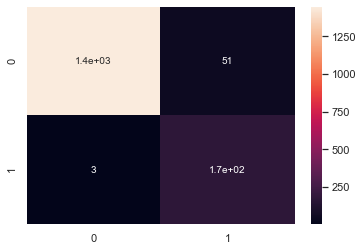

In [108]:
print(classification_report(pred4, y_test))
print('\n')
print(sns.heatmap(confusion_matrix(pred4, y_test), annot=True))

In [109]:
print(precision_score(pred4, y_test))
print(recall_score(pred4, y_test))
print(f1_score(pred4, y_test))
print(roc_auc_score(pred4, y_test))
print(accuracy_score(pred4, y_test))

0.7723214285714286
0.9829545454545454
0.865
0.9744318181818182
0.9677033492822966


## Logistic Regression

In [110]:
pipe5 = Pipeline([
    ('bow', CountVectorizer(analyzer=removestop)),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

pipe5.fit(X_train, y_train)
pred5 = pipe5.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1519
         1.0       0.68      0.99      0.81       153

    accuracy                           0.96      1672
   macro avg       0.84      0.97      0.89      1672
weighted avg       0.97      0.96      0.96      1672



AxesSubplot(0.125,0.125;0.62x0.755)


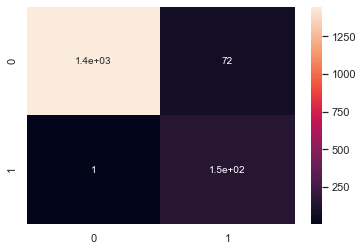

In [111]:
print(classification_report(pred5, y_test))
print('\n')
print(sns.heatmap(confusion_matrix(pred5, y_test), annot=True))

In [112]:
print(precision_score(pred5, y_test))
print(recall_score(pred5, y_test))
print(f1_score(pred5, y_test))
print(roc_auc_score(pred5, y_test))
print(accuracy_score(pred5, y_test))

0.6785714285714286
0.9934640522875817
0.8063660477453581
0.973032223642145
0.9563397129186603


## Voting classifier

In [123]:
model = VotingClassifier([
    ('rf', RandomForestClassifier(n_estimators=700)),
    ('cb',CatBoostClassifier()),
    ('mb',MultinomialNB())
],
    voting='hard',
    weights=[1, 1, 1], n_jobs=-1)

pipe6 = Pipeline([
    ('bow', CountVectorizer(analyzer=removestop)),
    ('tfidf', TfidfTransformer()),
    ('model', model)
])

pipe6.fit(X_train, y_train)
pred6 = pipe6.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1501
         1.0       0.76      1.00      0.87       171

    accuracy                           0.97      1672
   macro avg       0.88      0.98      0.92      1672
weighted avg       0.98      0.97      0.97      1672



AxesSubplot(0.125,0.125;0.62x0.755)


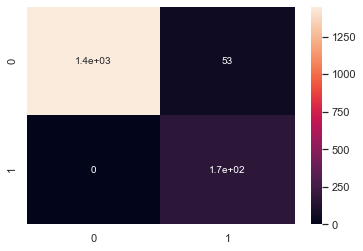

In [124]:
print(classification_report(pred6, y_test))
print('\n')
print(sns.heatmap(confusion_matrix(pred6, y_test), annot=True))

In [125]:
print(precision_score(pred6, y_test))
print(recall_score(pred6, y_test))
print(f1_score(pred6, y_test))
print(roc_auc_score(pred6, y_test))
print(accuracy_score(pred6, y_test))

0.7633928571428571
1.0
0.8658227848101265
0.9823451032644903
0.9683014354066986


## The Random forest classifier was the best performer of the 5 different algorithms being used to model the data.